In [1]:
import os
import torch
import dagshub
from PIL import Image

from tqdm.auto import tqdm

from xrkit.base import CONFIG
from xrkit.models import *
from xrkit.data.dataset import SegmentationDataset

from torch.utils.data import DataLoader

import pytorch_lightning as L
from pytorch_lightning.loggers import MLFlowLogger
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

os.chdir("..")
torch.set_float32_matmul_precision("high")
dagshub.init(CONFIG.dagshub.repository_name, CONFIG.dagshub.repository_owner, mlflow=True)

Initialized MLflow to track repo "imonteiroyh/NIH-ChestXRay"

Repository imonteiroyh/NIH-ChestXRay initialized!

In [2]:
train_dataset = SegmentationDataset("train")
train_loader = DataLoader(
    train_dataset,
    batch_size=CONFIG.base.batch_size,
    shuffle=False,
    num_workers=CONFIG.base.n_workers,
    pin_memory=True,
    drop_last=False,
)

validation_dataset = SegmentationDataset("validation")
validation_loader = DataLoader(
    validation_dataset,
    batch_size=CONFIG.base.batch_size,
    shuffle=False,
    num_workers=CONFIG.base.n_workers,
    pin_memory=True,
    drop_last=False,
)

test_dataset = SegmentationDataset("test")
test_loader = DataLoader(
    test_dataset,
    batch_size=CONFIG.base.batch_size,
    shuffle=False,
    num_workers=CONFIG.base.n_workers,
    pin_memory=True,
    drop_last=False,
)

In [3]:
epochs = 100
model = MobileNetV2UNetModel(n_epochs=epochs)

experiment_name = model.__class__.__name__.lower()[:-5]
metric, mode = "validation_dice", "max"

logger = MLFlowLogger(experiment_name=experiment_name, tracking_uri=CONFIG.dagshub.tracking_uri)

checkpoint_callback = ModelCheckpoint(
    monitor=metric,
    dirpath=f"models/{experiment_name}",
    filename="model-{epoch:03d}-{validation_dice:.2f}",
    save_top_k=1,
    mode=mode,
    enable_version_counter=False,
)

early_stop_callback = EarlyStopping(monitor=metric, min_delta=0.00, patience=10, mode=mode)
trainer = L.Trainer(max_epochs=epochs, logger=logger, callbacks=[checkpoint_callback, early_stop_callback])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [4]:
trainer.fit(model=model, train_dataloaders=train_loader, val_dataloaders=validation_loader)

run_id = trainer.logger.run_id
checkpoint_path = checkpoint_callback.best_model_path

/home/yullhan/miniconda3/envs/nih/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/yullhan/Projects/NIH-ChestXRay/models/mobilenetv2unet exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type            | Params
----------------------------------------------
0 | network   | MobileNetV2UNet | 2.2 M 
1 | criterion | DiceBCELoss     | 0     
----------------------------------------------
2.2 M     Trainable params
0         Non-trainable params
2.2 M     Total params
8.898     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [5]:
print(checkpoint_path)

dataloaders = {
    "train": train_loader,
    "validation": validation_loader,
    "test": test_loader,
}

results = trainer.predict(model=model, dataloaders=list(dataloaders.values()), ckpt_path=checkpoint_path)

Restoring states from the checkpoint path at /home/yullhan/Projects/NIH-ChestXRay/models/mobilenetv2unet/model-epoch=044-validation_dice=0.26.ckpt


/home/yullhan/Projects/NIH-ChestXRay/models/mobilenetv2unet/model-epoch=044-validation_dice=0.26.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /home/yullhan/Projects/NIH-ChestXRay/models/mobilenetv2unet/model-epoch=044-validation_dice=0.26.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

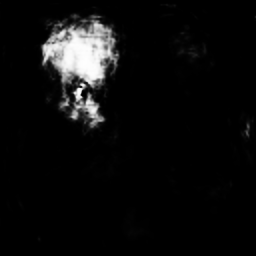

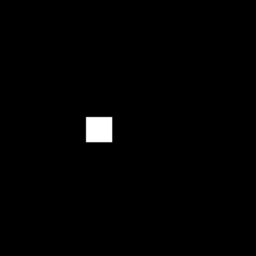

In [7]:
image = Image.fromarray((results[1][0][0][1] * 255).numpy()[0, :])
image.show()

image = Image.fromarray((results[1][0][1][1] * 255).numpy()[0, :])
image.show()